### Problem Statement

 

**Business Problem Overview -**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 


 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 


 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 


 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

**Understanding Churn-** Churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. And, prepaid is the most common model in India and southeast Asia.

**Definitions of Churn -**

1. Revenue-based churn - Churn were there is no revenue generated by the customers(no outgoing calls) but use the services.

2. Usage-based churn - Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet                            etc. over a period of time.<br/> In this case study, we will use the Usage-based Churn i.e, we will define the churn based on the recharges done

 

**High Value Churn -** Approximately 80% of revenue comes from the top 20% customers and we will label them as high value customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

**Business Objective -** The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

In churn prediction, we assume that there are three phases of customer lifecycle :

1. Good Phase - the customer is happy with the service and behaves as usual.

2. Action Phase - the customer experience starts to sore in this phase and the customer starts to show different behavior

3. Churn Phase - In this phase, the customer is said to have churned.

 

The dataset(telecom_churn_data) has data for 4 months(June,July,August and September). June and July will fall under the **Good Phase**, August in the **Action Phase** and September in the **Churn Phase**. The recharges and other revenue generating features in the **Churn Phase** will start to decline.

In [465]:
"""
    Loading all the required packages for model building
"""
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.metrics import classification_report,confusion_matrix,recall_score,accuracy_score,confusion_matrix,roc_curve, auc
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.utils import resample

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [466]:
""" 
    Setting the options for dataframes globally for visualizing sufficient items
"""
pd.set_option('max_rows',100)
pd.set_option('max_columns',None)
pd.set_option('max_seq_items',None)

pd.options.display.float_format = '{0:000f}'.format

In [467]:
"""
    This cell was written to upload the data file(telecom_churn_data.csv) to google colab notebook. 
    uncomment line 5 and line 6, if the note book is run on google colab and upload the file. 
"""
#from google.colab import files
#uploaded = files.upload()


'\n    This cell was written to upload the data file(telecom_churn_data.csv) to google colab notebook. \n    uncomment line 5 and line 6, if the note book is run on google colab and upload the file. \n'

In [468]:
local_path = "telecom_churn_data.csv"
if 'uploaded' in vars():
    master_df = pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))
else:
    master_df = pd.read_csv(local_path)
    

In [469]:
master_df.shape

(99999, 226)

In [470]:
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385000,214.816000,213.803000,21.100000,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,nan,nan,0.160000,nan,nan,nan,4.130000,nan,nan,nan,1.150000,nan,nan,nan,5.440000,nan,nan,nan,0.000000,nan,nan,n

In [471]:
working_df = master_df.copy()

#### Filter high-value customers

As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

we will define the high value customer and assign the churn value based on the recharge amount in September and then we will proceed with EDA on the high value customer dataframe

['total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9','total_rech_data_6', 'total_rech_data_7',
'total_rech_data_8', 'total_rech_data_9'] 
The above columns give us the total recharge amount(voice + data) for every customer. 

In [472]:
#Calculating the total data recharge in June and July - number of recharges * avg recharge amount 

working_df['rech_data_6'] = working_df['total_rech_data_6']*working_df['av_rech_amt_data_6']
working_df['rech_data_7'] = working_df['total_rech_data_7']*working_df['av_rech_amt_data_7']

working_df['total_rech_6'] = working_df[['total_rech_amt_6','rech_data_6']].sum(axis=1)
working_df['total_rech_7'] = working_df[['total_rech_amt_7','rech_data_7']].sum(axis=1)

working_df['avg_rech_6_7'] = working_df[['total_rech_6','total_rech_7']].mean(axis=1)


In [473]:
working_df[['rech_data_6','rech_data_7','total_rech_amt_6','total_rech_amt_7','total_rech_6','total_rech_7','avg_rech_6_7']].describe()

,rech_data_6,rech_data_7,total_rech_amt_6,total_rech_amt_7,total_rech_6,total_rech_7,avg_rech_6_7
count,25153.000000,25571.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,591.906758,669.872284,327.514615,322.962970,476.398411,494.257724,485.328068
std,1519.671866,1564.306233,398.019701,408.114237,965.021989,1012.754850,869.423594
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142.000000,145.000000,109.000000,100.000000,110.000000,110.000000,128.000000
50%,198.000000,207.000000,230.000000,220.000000,266.000000,258.000000,275.000000
75%,608.000000,616.000000,437.500000,428.000000,549.000000,550.000000,553.000000
max,105644.000000,55080.000000,35190.000000,40335.000000,113458.000000,56075.000000,61236.000000


In [474]:
# Calculating the 70th percentile for ['rech_data_6','rech_data_7','total_rech_amt_6','total_rech_amt_7','total_rech_6','total_rech_7','avg_rech_6_7']

print('The different 70th percentiles are:')
print('June DataRecharge70 = ',working_df['rech_data_6'].quantile(0.7))
print('July DataRecharge70 = ',working_df['rech_data_7'].quantile(0.7))

print('June VoiceRecharge70 = ',working_df['total_rech_amt_6'].quantile(0.7))
print('July VoiceRecharge70 = ',working_df['total_rech_amt_7'].quantile(0.7))

print('June TotalRecharge70 = ',working_df['total_rech_6'].quantile(0.7))
print('July TotalRecharge70 = ',working_df['total_rech_7'].quantile(0.7))

print('June-July AvgRecharge70 = ',working_df['avg_rech_6_7'].quantile(0.7))

The different 70th percentiles are:
June DataRecharge70 =  444.0
July DataRecharge70 =  575.0
June VoiceRecharge70 =  378.0
July VoiceRecharge70 =  370.0
June TotalRecharge70 =  476.0
July TotalRecharge70 =  476.0
June-July AvgRecharge70 =  478.0


Create a new dataframe **high_value_df** to store the records of high value customers(Avg Recharge in June and July is greater or equal to 70th Percentile of Avg Recharge in June and July). 

In [475]:
high_value_df = working_df[working_df['avg_rech_6_7']>= working_df['avg_rech_6_7'].quantile(0.7)]

In [476]:
high_value_df.shape

(30001, 231)

In [477]:
#Checking for null or nan values in the four columns - 
# ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','vol_3g_mb_9']
high_value_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','vol_3g_mb_9']].isnull().sum()*100/ len(high_value_df)

total_ic_mou_9   0.000000
total_og_mou_9   0.000000
vol_2g_mb_9      0.000000
vol_3g_mb_9      0.000000
vol_3g_mb_9      0.000000
dtype: float64

In [478]:
high_value_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848,349.513848
std,358.290694,666.902007,282.370006,947.079372,947.079372
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000,39221.270000


**Tag churners and remove attributes of the churn phase -**
Let's tag the churned customers **(churn=1, non-churn 0)** based on the data from september: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9 
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [479]:
high_value_df['churn'] = high_value_df.apply(lambda row : 1 if row['total_ic_mou_9']==0 and row['total_og_mou_9']==0
                                            and row['vol_2g_mb_9']==0 and row['vol_3g_mb_9']==0 else 0 , axis =1)

In [480]:
high_value_df['churn'].value_counts()*100/len(high_value_df)

0   91.863605
1    8.136395
Name: churn, dtype: float64

In [481]:
high_value_df.shape

(30001, 232)

In [482]:
#copying the high_value_df in a master DF - high_value_df_master
high_value_df_master = high_value_df.copy()

In [483]:
#removing the columns that have zero variance - all the rows have same value and therefore don't add any information. 
high_value_df = high_value_df.loc[:,high_value_df.apply(pd.Series.nunique) != 1]

In [484]:
high_value_df.shape

(30001, 216)

In [485]:
high_value_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6,rech_data_7,total_rech_6,total_rech_7,avg_rech_6_7,churn
0,7000842753,197.385000,214.816000,213.803000,21.100000,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,nan,nan,0.160000,nan,nan,nan,4.130000,nan,nan,nan,1.150000,nan,nan,nan,5.440000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,0.000000,5.440000,0.000000,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.000000,1.000000,1

Now, that we have the high value customers dataframe(30001 rows) and defined the churn value for all the rows we will proceed with the EDA. <br/> Let's deal with the missing values first

In [486]:
#let's compute the percentage of missing values and store it in a dataframe
column_vals = high_value_df.columns
missing_values = high_value_df.isnull().sum()
missing_value_percent= high_value_df.isnull().sum()*100/len(high_value_df)

frame = {'column':column_vals,'percentage':missing_value_percent, 'missing_values':missing_values}

missing_df = pd.DataFrame(frame)
missing_df.reset_index(drop=True,inplace=True)


In [487]:
#taking columns that have atleast one missing value
missing_df = missing_df[missing_df['percentage']>0]

In [488]:
missing_df.shape

(154, 3)

In [489]:
missing_df.head()

,column,percentage,missing_values
5,onnet_mou_6,1.816606,545
6,onnet_mou_7,1.789940,537
7,onnet_mou_8,3.913203,1174
8,onnet_mou_9,6.336455,1901
9,offnet_mou_6,1.816606,545


In [490]:
#Let's print few quantile values of the percentages
missing_df['percentage'].quantile([0,0.1,0.20,0.40,0.50,0.6,0.7,0.72,0.73,0.74,0.75,0.8,1.0])

0.000000    0.243325
0.100000    1.789940
0.200000    1.816606
0.400000    3.913203
0.500000    3.913203
0.600000    6.336455
0.700000    6.336455
0.720000    6.336455
0.730000   31.734509
0.740000   43.145228
0.750000   43.145228
0.800000   43.546548
1.000000   49.268358
Name: percentage, dtype: float64

 72 percent of the values in the missing data frame have value less than 6.33. So, let's analyse the columns which have
 missing value greater than 40 percent.

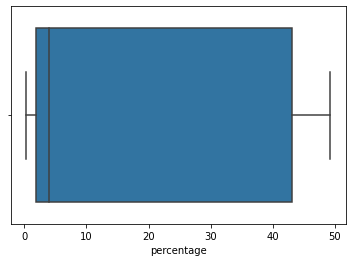

In [491]:
sns.boxplot(missing_df['percentage'])

In [492]:
#getting all the columns that have missing values greater than 20 percent
missing_df_20 = missing_df[missing_df['percentage']>20]

In [493]:
missing_df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 141 to 211
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   column          42 non-null     object 
 1   percentage      42 non-null     float64
 2   missing_values  42 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [494]:
cols_20 = list(missing_df_20['column'])
cols_20

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'rech_data_6',
 'rech_data_7']

In [495]:
max_rech_data_cols =['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']
date_data_cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
total_data_cols =['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']
count_rech_2g_cols =['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9']
count_rech_3g_cols = ['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']
avg_rech_data_cols =['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
arpu_3g_cols = ['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9']
arpu_2g_cols = ['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']
night_pack_cols =['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']
fb_users_cols =['fb_user_6','fb_user_7','fb_user_8','fb_user_9']
date_cols =['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']

In [496]:
high_value_df = high_value_df_master.copy()

In [497]:
high_value_df[max_rech_data_cols].head()

,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,252.000000,252.000000,252.000000,nan
7,nan,nan,nan,nan
8,nan,154.000000,23.000000,nan
21,nan,nan,nan,nan
23,nan,179.000000,179.000000,252.000000


In [498]:

# let's impute mean value for the max_rech_data_cols =['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']
#   in the high_value_df
for col in max_rech_data_cols:
    high_value_df[col].fillna(high_value_df[col].mean(),inplace=True)


In [499]:
high_value_df[max_rech_data_cols].head()

,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
0,252.000000,252.000000,252.000000,140.813403
7,139.798580,140.431143,136.329217,140.813403
8,139.798580,154.000000,23.000000,140.813403
21,139.798580,140.431143,136.329217,140.813403
23,139.798580,179.000000,179.000000,252.000000


In [500]:
high_value_df[total_data_cols].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
0,1.000000,1.000000,1.000000,nan
7,nan,nan,nan,nan
8,nan,2.000000,3.000000,nan
21,nan,nan,nan,nan
23,nan,2.000000,2.000000,1.000000


In [501]:
for col in total_data_cols:
    print(high_value_df[col].mode())

0   1.000000
dtype: float64
0   1.000000
dtype: float64
0   1.000000
dtype: float64
0   1.000000
dtype: float64


In [502]:
# Let's impute with mode for total_data_cols

for col in total_data_cols:
    high_value_df[col].fillna(1.000000,inplace = True)

# derive below in the end 

#Let's bin the data in the total_rech_data cols into 'low_freq','high_freq','medium_freq'

high_value_df['freq_data'] = high_value_df['total_rech_data_6'].map(lambda x: 0 if x>1 else 1)

In [503]:
high_value_df[total_data_cols].head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
0,1.000000,1.000000,1.000000,1.000000
7,1.000000,1.000000,1.000000,1.000000
8,1.000000,2.000000,3.000000,1.000000
21,1.000000,1.000000,1.000000,1.000000
23,1.000000,2.000000,2.000000,1.000000


In [504]:
high_value_df[avg_rech_data_cols].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.000000,252.000000,252.000000,nan
7,nan,nan,nan,nan
8,nan,177.000000,69.000000,nan
21,nan,nan,nan,nan
23,nan,356.000000,270.000000,252.000000


In [505]:

# let's impute mean value for the avg_rech_data_cols =['avg_rech_data_6','avg_rech_data_7','avg_rech_data_8','avg_rech_data_9']
#   in the high_value_df

for col in avg_rech_data_cols:
    high_value_df[col].fillna(high_value_df[col].mean(),inplace=True)

In [506]:
high_value_df[avg_rech_data_cols].head()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,252.000000,252.000000,252.000000,227.723582
7,233.931758,245.857602,229.680303,227.723582
8,233.931758,177.000000,69.000000,227.723582
21,233.931758,245.857602,229.680303,227.723582
23,233.931758,356.000000,270.000000,252.000000


['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9'] These are the date columns and cannot be imputed any value randomly. So, we proceed to drop these columns

Let's check if the null values for 6th month are for the same custumers by comparing the june related columns to see if we can impute a common value like 0 in these columns

In [507]:
june_cols = ['arpu_3g_6','night_pck_user_6','count_rech_2g_6','count_rech_3g_6','fb_user_6','arpu_2g_6']

index_arpu_3g_6 = high_value_df['arpu_3g_6'].isna()
index_arpu_2g_6 = high_value_df['arpu_2g_6'].isna()
index_night_pck_user_6_index = high_value_df['night_pck_user_6'].isna()
index_count_rech_2g_6_index = high_value_df['count_rech_2g_6'].isna()
index_count_rech_3g_6 = high_value_df['count_rech_3g_6'].isna()
index_fb_user_6 = high_value_df['fb_user_6'].isna()

if index_arpu_3g_6.equals(index_count_rech_2g_6_index) and index_count_rech_2g_6_index.equals(index_count_rech_3g_6) and index_count_rech_3g_6.equals(index_fb_user_6) and index_fb_user_6.equals(index_night_pck_user_6_index) :
    high_value_df[june_cols] = high_value_df[june_cols].fillna(0)
    

In [508]:
#Let's repeat the same steps as above for july columns
july_cols = ['arpu_3g_7','night_pck_user_7','count_rech_2g_7','count_rech_3g_7','fb_user_7','arpu_2g_7']

index_arpu_3g_7 = high_value_df['arpu_3g_7'].isna()
index_arpu_2g_7 = high_value_df['arpu_2g_7'].isna()
index_night_pck_user_7_index = high_value_df['night_pck_user_7'].isna()
index_count_rech_2g_7_index = high_value_df['count_rech_2g_7'].isna()
index_count_rech_3g_7 = high_value_df['count_rech_3g_7'].isna()
index_fb_user_7 = high_value_df['fb_user_7'].isna()

if index_arpu_3g_7.equals(index_count_rech_2g_7_index) and index_count_rech_2g_7_index.equals(index_count_rech_3g_7) and index_count_rech_3g_7.equals(index_fb_user_7) and index_fb_user_7.equals(index_night_pck_user_7_index) and index_night_pck_user_7_index.equals(index_arpu_2g_7):
    high_value_df[july_cols] = high_value_df[july_cols].fillna(0)
    

In [509]:
#Let's repeat the same steps as above for august columns
august_cols = ['arpu_3g_8','night_pck_user_8','count_rech_2g_8','count_rech_3g_8','fb_user_8','arpu_2g_8']

index_arpu_3g_8 = high_value_df['arpu_3g_8'].isna()
index_arpu_2g_8 = high_value_df['arpu_2g_8'].isna()
index_night_pck_user_8_index = high_value_df['night_pck_user_8'].isna()
index_count_rech_2g_8_index = high_value_df['count_rech_2g_8'].isna()
index_count_rech_3g_8 = high_value_df['count_rech_3g_8'].isna()
index_fb_user_8 = high_value_df['fb_user_8'].isna()

if index_arpu_3g_8.equals(index_count_rech_2g_8_index) and index_count_rech_2g_8_index.equals(index_count_rech_3g_8) and index_count_rech_3g_8.equals(index_fb_user_8) and index_fb_user_8.equals(index_night_pck_user_8_index) and index_night_pck_user_8_index.equals(index_arpu_2g_8):
    high_value_df[august_cols] = high_value_df[august_cols].fillna(0)
    

In [510]:
#Let's repeat the same steps as above for september columns. We will be ignoring september cols while model building
september_cols = ['arpu_3g_9','night_pck_user_9','count_rech_2g_9','count_rech_3g_9','fb_user_9','arpu_2g_9']

index_arpu_3g_9 = high_value_df['arpu_3g_9'].isna()
index_arpu_2g_9 = high_value_df['arpu_2g_9'].isna()
index_night_pck_user_9_index = high_value_df['night_pck_user_9'].isna()
index_count_rech_2g_9_index = high_value_df['count_rech_2g_9'].isna()
index_count_rech_3g_9 = high_value_df['count_rech_3g_9'].isna()
index_fb_user_9 = high_value_df['fb_user_9'].isna()

if index_arpu_3g_9.equals(index_count_rech_2g_9_index) and index_count_rech_2g_9_index.equals(index_count_rech_3g_9) and index_count_rech_3g_9.equals(index_fb_user_9) and index_fb_user_9.equals(index_night_pck_user_9_index) and index_night_pck_user_9_index.equals(index_arpu_2g_9):
    high_value_df[september_cols] = high_value_df[september_cols].fillna(0)
    

Let's impute 0 into rech_data_6 and rech_data_7 columns which were derived to filter the high value customers.

In [511]:
high_value_df[['rech_data_6','rech_data_7']].head()

,rech_data_6,rech_data_7
0,252.000000,252.000000
7,nan,nan
8,nan,354.000000
21,nan,nan
23,nan,712.000000


In [512]:
#Let's impute mean for rech_data_6 and rech_data_7 as these are continous values
high_value_df['rech_data_6'].fillna(high_value_df['rech_data_6'].mean(),inplace=True)

high_value_df['rech_data_7'].fillna(high_value_df['rech_data_7'].mean(),inplace=True)

In [513]:
high_value_df[['rech_data_6','rech_data_7']].head()

,rech_data_6,rech_data_7
0,252.000000,252.000000
7,816.052206,929.093052
8,816.052206,354.000000
21,816.052206,929.093052
23,816.052206,712.000000


In [514]:
high_value_df.drop(date_cols,axis=1,inplace=True)
high_value_df.drop(date_data_cols,axis=1,inplace=True)

In [515]:
# Let's drop the september columns
_9_cols = list(high_value_df.columns[high_value_df.columns.map(lambda x: x.endswith('9') )])
_6_7_8_df = high_value_df.drop(_9_cols,axis=1)


In [516]:
high_value_df = _6_7_8_df.copy()

Let's see the missing value percentages in the columns after imputer some of the columns. 

In [517]:
#let's compute the percentage of missing values and store it in a dataframe
column_vals = high_value_df.columns
missing_values = high_value_df.isnull().sum()
missing_value_percent= high_value_df.isnull().sum()*100/len(high_value_df)

frame = {'column':column_vals,'percentage':missing_value_percent, 'missing_values':missing_values}

missing_df = pd.DataFrame(frame)
missing_df.reset_index(drop=True,inplace=True)


In [518]:
missing_df= missing_df[missing_df['percentage']>0]

In [519]:
len(missing_df)

92

if we look at the missing_df dataframe, all the columns that come under 6(June) have same percentage of missing values, and same for 7(July), 8(august) and 9(september). So, we will impute 0s for these columns

In [520]:
missing_df

,column,percentage,missing_values
2,loc_og_t2o_mou,0.746642,224
3,std_og_t2o_mou,0.746642,224
4,loc_ic_t2o_mou,0.746642,224
6,last_date_of_month_7,0.089997,27
7,last_date_of_month_8,0.549982,165
11,onnet_mou_6,1.816606,545
12,onnet_mou_7,1.789940,537
13,onnet_mou_8,3.913203,1174
14,offnet_mou_6,1.816606,545
15,offnet_mou_7,1.789940,537


In [522]:
high_value_df.dropna(inplace= True, axis =0)

In [523]:
high_value_df.isnull().values.any()

False

In [524]:
high_value_df.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 172 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mobile_number         28504 non-null  int64  
 1   circle_id             28504 non-null  int64  
 2   loc_og_t2o_mou        28504 non-null  float64
 3   std_og_t2o_mou        28504 non-null  float64
 4   loc_ic_t2o_mou        28504 non-null  float64
 5   last_date_of_month_6  28504 non-null  object 
 6   last_date_of_month_7  28504 non-null  object 
 7   last_date_of_month_8  28504 non-null  object 
 8   arpu_6                28504 non-null  float64
 9   arpu_7                28504 non-null  float64
 10  arpu_8                28504 non-null  float64
 11  onnet_mou_6           28504 non-null  float64
 12  onnet_mou_7           28504 non-null  float64
 13  onnet_mou_8           28504 non-null  float64
 14  offnet_mou_6          28504 non-null  float64
 15  offnet_mou_7      

Now, high_value_df does not have any NaNs in any of the columns, let's proceed to derive new features 

#### Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [525]:
high_value_df.shape

(28504, 172)

Let's compute the avg of attributes for June and July months and then further drop these individual columns

In [528]:
# Let's drop the date columns 'last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8'
high_value_df.drop(['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

In [529]:
_6_cols = list(high_value_df.columns[high_value_df.columns.map(lambda x: x.endswith('6') )])
_7_cols = list(high_value_df.columns[high_value_df.columns.map(lambda x: x.endswith('7') )])
_7_cols.remove('avg_rech_6_7')

for n,col_6 in enumerate(_6_cols):
    common= col_6[:-2]
    col_7 = common+'_7'    #computing the corresponding column name for July
    avg_col = 'avg_'+common     #computing the corresponding column name for avg value
    high_value_df[avg_col] = (high_value_df[col_6] + high_value_df[col_7])/2 #computing the avg of 6 and 7 & storing it in avg column
    #high_value_df.drop([col_6,col_7],axis=1,inplace=True) #dropping the june and july column after computing the avg
    

In [531]:
high_value_df.shape

(28504, 222)

In [532]:
high_value_df['churn'] = high_value_df['churn'].astype('category')

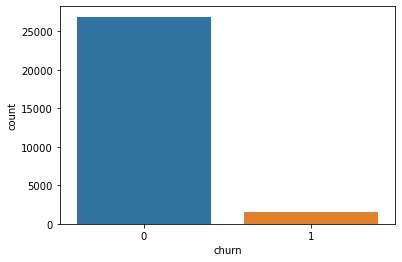

In [533]:
sns.countplot(high_value_df['churn'])

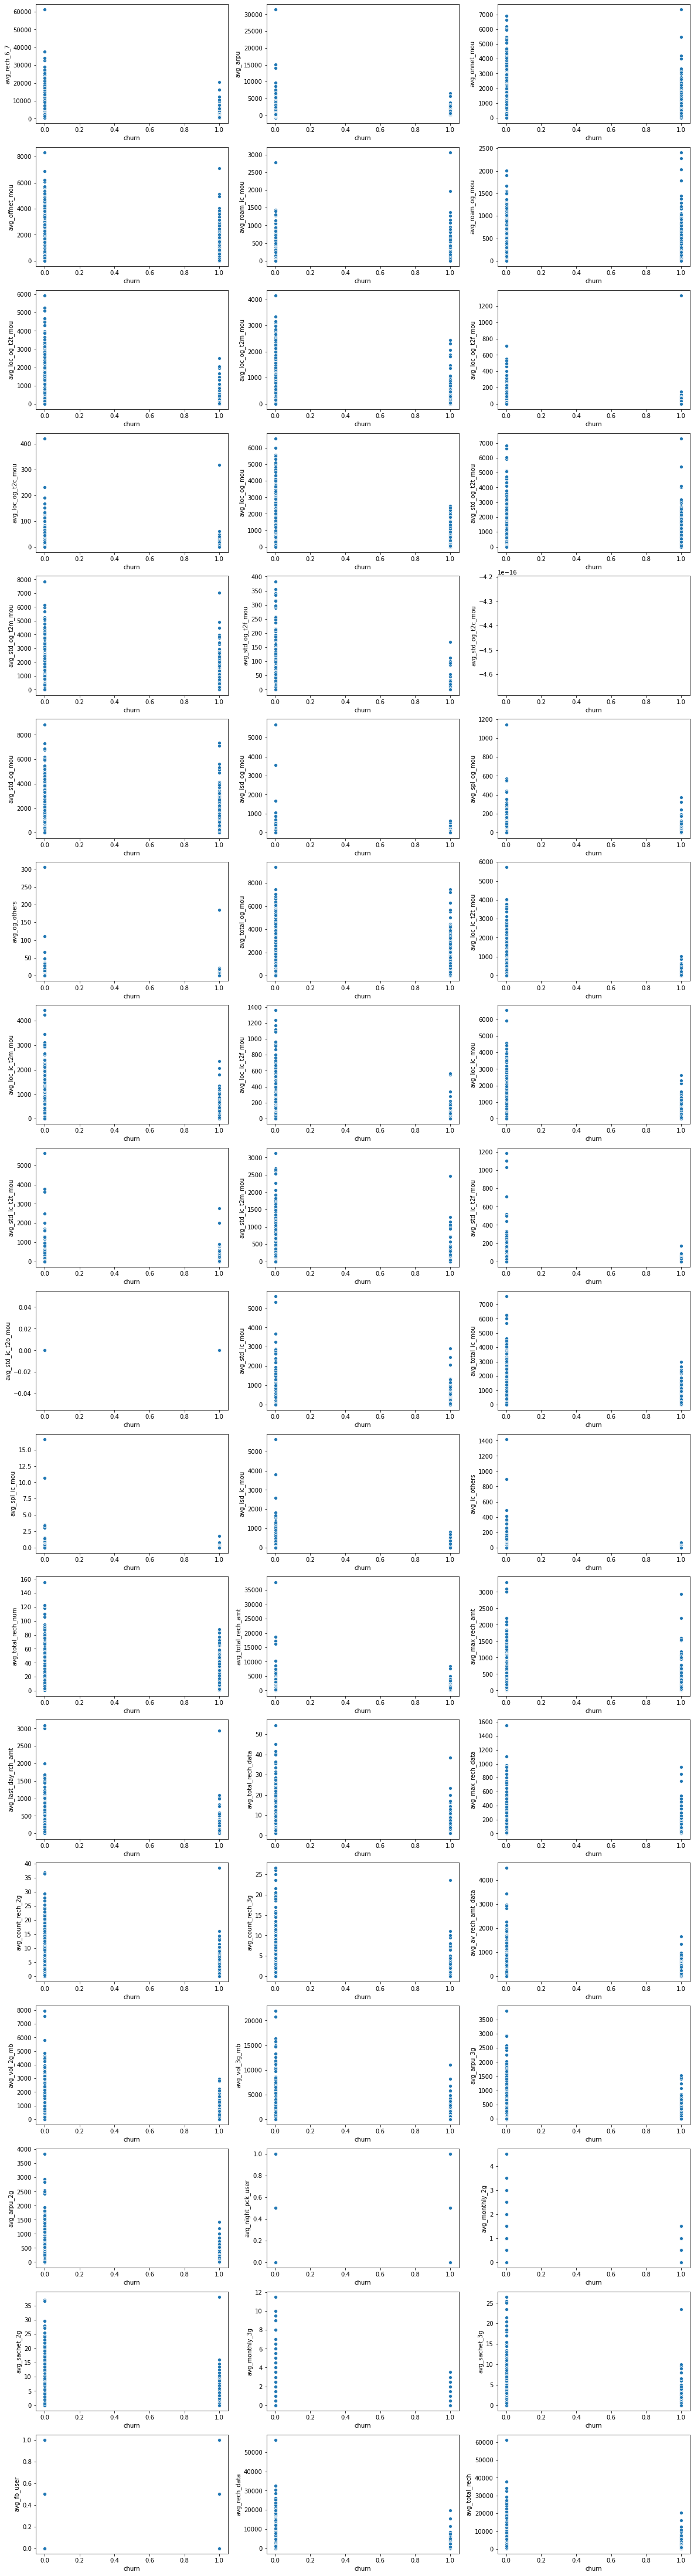

In [545]:
#Let's plot the avg_columns against the output variable
features = list(high_value_df.columns[high_value_df.columns.map(lambda x: x.startswith('avg'))])
plt.figure(figsize=(20,80))
n=1
for feature in features:
    plt.subplot(18,3,n)
    sns.scatterplot(x=high_value_df['churn'],y=high_value_df[feature])
    n=n+1

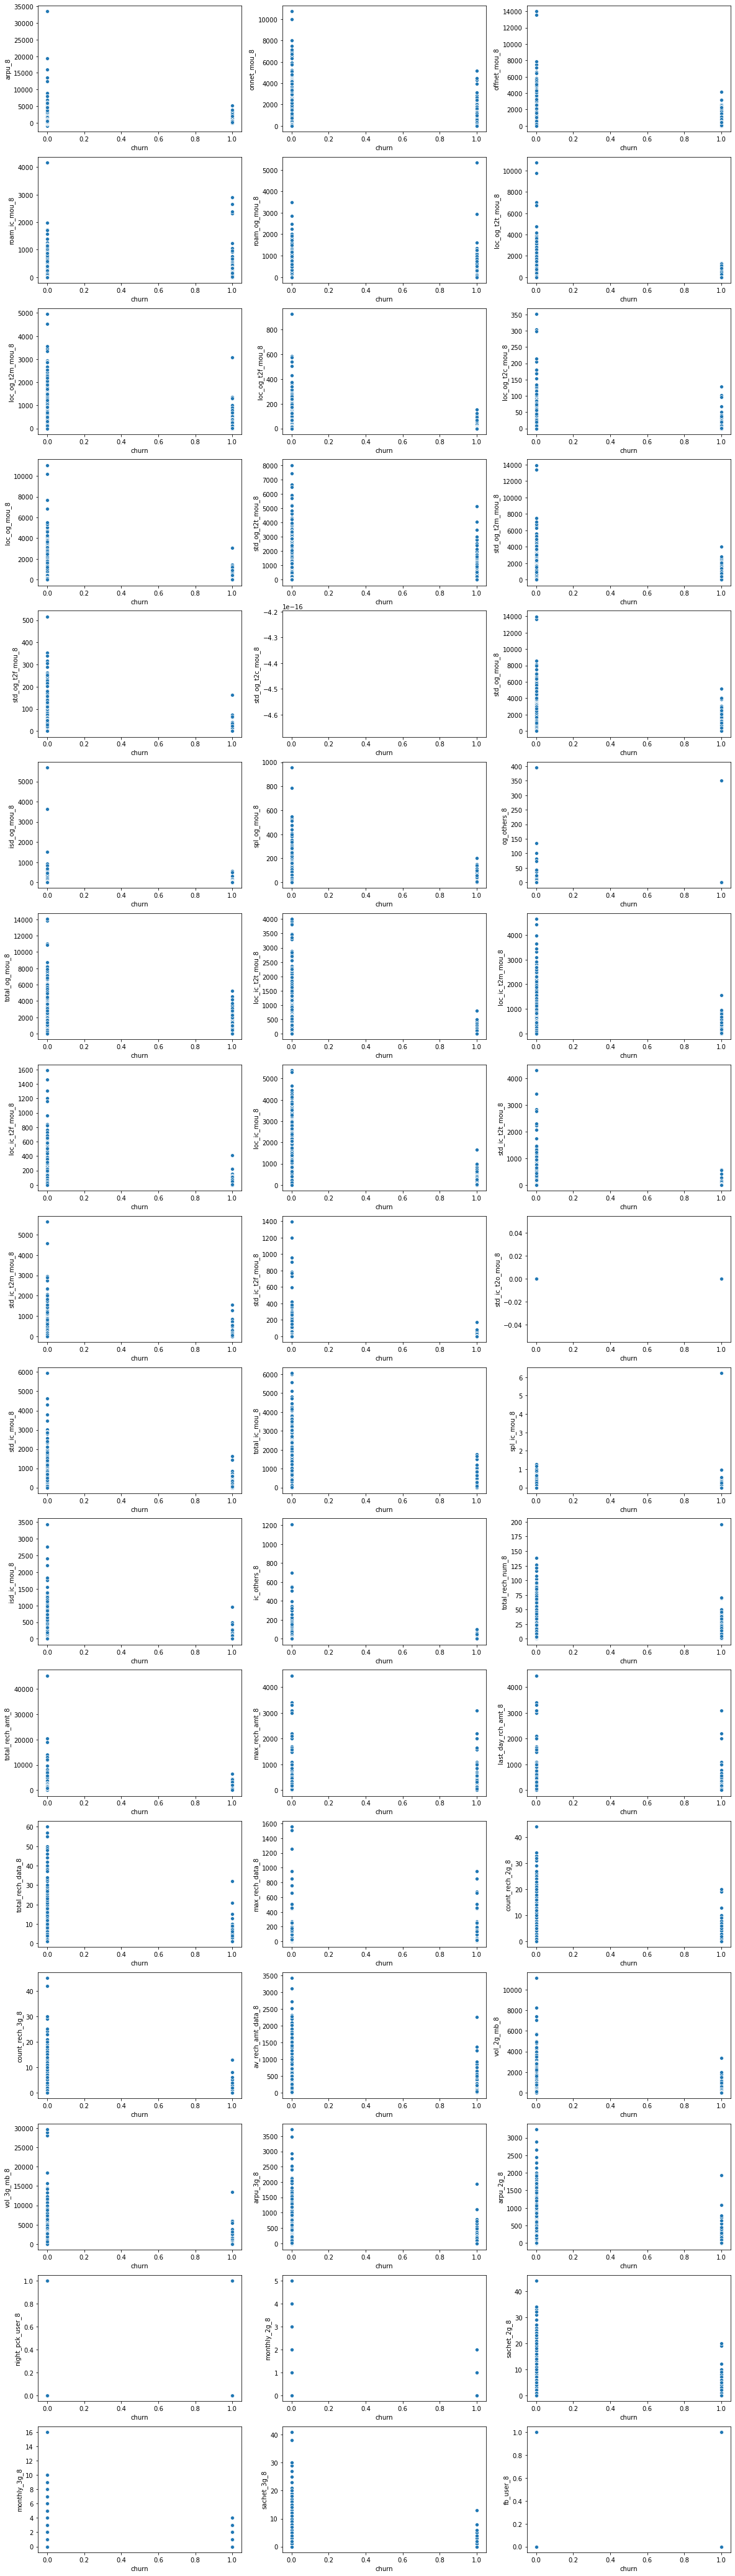

In [546]:
#Let's plot the august_columns against the output variable
features = list(high_value_df.columns[high_value_df.columns.map(lambda x: x.endswith('8'))])
plt.figure(figsize=(20,80))
n=1
for feature in features:
    plt.subplot(18,3,n)
    sns.scatterplot(x=high_value_df['churn'],y=high_value_df[feature])
    n=n+1

In [548]:
high_value_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6,rech_data_7,total_rech_6,total_rech_7,avg_rech_6_7,churn,avg_arpu,avg_onnet_mou,avg_offnet_mou,avg_roam_ic_mou,avg_roam_og_mou,avg_loc_og_t2t_mou,avg_loc_og_t2m_mou,avg_loc_og_t2f_mou,avg_loc_og_t2c_mou,avg_loc_og_mou,avg_std_og_t2t_mou,avg_std_og_t2m_mou,avg_std_og_t2f_mou,avg_std_og_t2c_mou,avg_std_og_mou,avg_isd_og_mou,avg_spl_og_mou,avg_og_others,avg_total_og_mou,avg_loc_ic_t2t_mou,avg_loc_ic_t2m_mou,avg_loc_ic_t2f_mou,avg_loc_ic_mou,avg_std_ic_t2t_mou,avg_std_ic_t2m_mou,avg_std_ic_t2f_mou,avg_std_ic_t2o_mou,avg_std_ic_mou,avg_total_ic_mou,avg_spl_ic_mou,avg_isd_ic_mou,avg_ic_others,avg_total_rech_num,avg_total_rech_amt,avg_max_rech_amt,avg_last_day_rch_amt,avg_total_rech_data,avg_max_rech_data,avg_count_rech_2g,avg_count_rech_3g,avg_av_rech_amt_data,avg_vol_2g_mb,avg_vol_3g_mb,avg_arpu_3g,avg_arpu_2g,avg_night_pck_user,avg_monthly_2g,avg_sachet_2g,avg_monthly_3g,avg_sachet_3g,avg_fb_user,avg_rech_data,avg_total_rech
7,7000701601,109,0.000000,0.000000,0.000000,1069.180000,1349.850000,3171.480000,57.840000,54.680000,52.290000,453.430000,567.160000,325.910000,16.230000,33.490000,31.640000,23.740000,12.590000,38.060000,51.390000,31.380000,40.280000,308.630000,447.380000,162.280000,62.130000,55.140000,53.230000,0.000000,0.000000,0.000000,422.160000,533.910000,255.790000,4.300000,23.290000,12.010000,49.890000,31.760000,49.140000,6.660000,20.080000,16.680000,0.000000,0.000000,0.000000,60.860000,75.140000,77.840000,0.000000,0.180000,10.010000,4.500000,0.000000,6.500000,0.000000,0.000000,0.000000,487.530000,609.240000,350.160000,58.140000,32.260000,27.310000,217.560000,221.490000,121.190000,152.160000,101.

[Text(0, 0.5, 'percentage')]

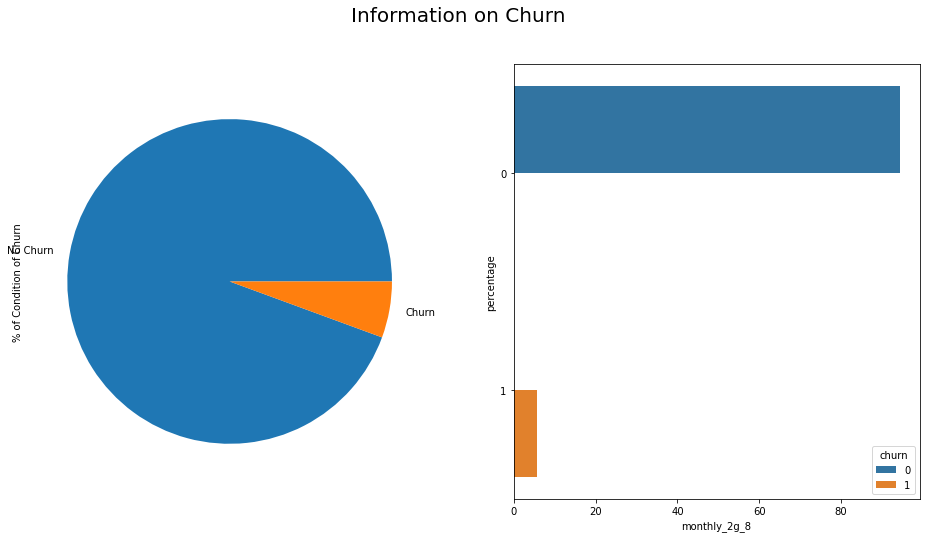

In [534]:
f, ax = plt.subplots(1,2, figsize=(16,8))

plt.suptitle('Information on Churn', fontsize=20)

high_value_df["churn"].value_counts().plot.pie( ax=ax[0],labels=['No Churn','Churn'])
ax[0].set_ylabel('% of Condition of Churn')


sns.barplot(x="monthly_2g_8", y="churn", hue="churn", data=high_value_df, 
            estimator=lambda x: len(x) / len(high_value_df) * 100)
ax[1].set(ylabel="percentage")

In [535]:
#function to upsample the high_value_df
def UpSample(df,n):
    df_minority = df[df['churn']==1]
    df_majority = df[df['churn']==0]
    df_minority_upsample = resample(df_minority, replace = True, n_samples = n,random_state=42)
    return pd.concat([df_majority,df_minority_upsample])

In [536]:
_6_7_8_df = high_value_df.copy()

In [537]:
#split the data into train and test
#X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
df_train,df_test = train_test_split(_6_7_8_df,test_size = 0.25, random_state = 42)

In [538]:
print('Train Shape - ', df_train.shape)
print('Test Shape - ', df_test.shape)

Train Shape -  (21378, 222)
Test Shape -  (7126, 222)


In [539]:
print('The value_counts before upsampling is - ',Counter(df_train['churn']))
upsampled_df = UpSample(df_train,20146)
print('The value_counts after upsampling is -', Counter(upsampled_df['churn']))

The value_counts before upsampling is -  Counter({0: 20146, 1: 1232})
The value_counts after upsampling is - Counter({0: 20146, 1: 20146})


In [540]:
upsampled_df.shape

(40292, 222)

In [541]:
df_test.shape

(7126, 222)

In [542]:
X_train = upsampled_df.drop(['churn'],axis=1)
y_train = upsampled_df['churn']

X_test = df_test.drop(['churn'],axis=1)
y_test = df_test['churn']

In [543]:
#Let's Standardize the data in the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.copy())
X_test = scaler.transform(X_test.copy())

In [236]:
print('X_train Shape - ',X_train.shape)
print('y_train Shape - ',y_train.shape)
print('X_test Shape - ',X_test.shape)
print('y_test Shape - ',y_test.shape)

X_train Shape -  (40292, 172)
y_train Shape -  (40292,)
X_test Shape -  (7126, 172)
y_test Shape -  (7126,)


# Logistic Regression for feature selection

In [154]:
df_without_PCA = high_value_df.copy()
df_without_PCA

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_data_6,rech_data_7,total_rech_6,total_rech_7,avg_rech_6_7,churn,avg_arpu,avg_onnet_mou,avg_offnet_mou,avg_roam_ic_mou,avg_roam_og_mou,avg_loc_og_t2t_mou,avg_loc_og_t2m_mou,avg_loc_og_t2f_mou,avg_loc_og_t2c_mou,avg_loc_og_mou,avg_std_og_t2t_mou,avg_std_og_t2m_mou,avg_std_og_t2f_mou,avg_std_og_t2c_mou,avg_std_og_mou,avg_isd_og_mou,avg_spl_og_mou,avg_og_others,avg_total_og_mou,avg_loc_ic_t2t_mou,avg_loc_ic_t2m_mou,avg_loc_ic_t2f_mou,avg_loc_ic_mou,avg_std_ic_t2t_mou,avg_std_ic_t2m_mou,avg_std_ic_t2f_mou,avg_std_ic_t2o_mou,avg_std_ic_mou,avg_total_ic_mou,avg_spl_ic_mou,avg_isd_ic_mou,avg_ic_others,avg_total_rech_num,avg_total_rech_amt,avg_max_rech_amt,avg_last_day_rch_amt,avg_total_rech_data,avg_max_rech_data,avg_count_rech_2g,avg_count_rech_3g,avg_av_rech_amt_data,avg_vol_2g_mb,avg_vol_3g_mb,avg_arpu_3g,avg_arpu_2g,avg_night_pck_user,avg_monthly_2g,avg_sachet_2g,avg_monthly_3g,avg_sachet_3g,avg_fb_user,avg_rech_data,avg_total_rech
7,7000701601,109,0.000000,0.000000,0.000000,1069.180000,1349.850000,3171.480000,57.840000,54.680000,52.290000,453.430000,567.160000,325.910000,16.230000,33.490000,31.640000,23.740000,12.590000,38.060000,51.390000,31.380000,40.280000,308.630000,447.380000,162.280000,62.130000,55.140000,53.230000,0.000000,0.000000,0.000000,422.160000,533.910000,255.790000,4.300000,23.290000,12.010000,49.890000,31.760000,49.140000,6.660000,20.080000,16.680000,0.000000,0.000000,0.000000,60.860000,75.140000,77.840000,0.000000,0.180000,10.010000,4.500000,0.000000,6.500000,0.000000,0.000000,0.000000,487.530000,609.240000,350.160000,58.140000,32.260000,27.310000,217.560000,221.490000,121.190000,152.160000,101.

In [155]:
df_without_PCA = df_without_PCA.reset_index()

In [156]:
# Splitting the Data into Training and Testing Sets
np.random.seed(0)
df_without_PCA_train, df_without_PCA_test = train_test_split(df_without_PCA, train_size = 0.7, test_size = 0.3, random_state = 42)

In [157]:
X_train_without_PCA = df_without_PCA_train.drop(['churn'],axis=1)
y_train_without_PCA = df_without_PCA_train['churn']

X_test_without_PCA = df_without_PCA_test.drop(['churn'],axis=1)
y_test_without_PCA = df_without_PCA_test['churn']

In [158]:
X_train_without_PCA_cols = X_train_without_PCA.columns
X_test_without_PCA_cols = X_test_without_PCA.columns
X_test_without_PCA_cols

Index(['index', 'mobile_number', 'circle_id', 'loc_og_t2o_mou',
       'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', '

In [159]:
X_train_without_PCA = pd.DataFrame(scaler.fit_transform(X_train_without_PCA))
X_test_without_PCA = pd.DataFrame(scaler.transform(X_test_without_PCA))

In [160]:
X_train_without_PCA.columns = X_train_without_PCA_cols
X_test_without_PCA.columns = X_test_without_PCA_cols

In [161]:
print('X_train Shape - ',X_train_without_PCA.shape)
print('y_train Shape - ',y_train_without_PCA.shape)
print('X_test Shape - ',X_test_without_PCA.shape)
print('y_test Shape - ',y_test_without_PCA.shape)

X_train Shape -  (19952, 222)
y_train Shape -  (19952,)
X_test Shape -  (8552, 222)
y_test Shape -  (8552,)


In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8110
           1       0.44      0.10      0.16       442

    accuracy                           0.95      8552
   macro avg       0.70      0.55      0.57      8552
weighted avg       0.93      0.95      0.93      8552



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fd6290c10>)

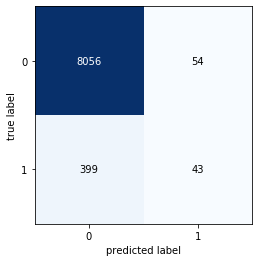

In [163]:
lr = LogisticRegression()

# Fit..
lr.fit(X_train_without_PCA, y_train_without_PCA)

# Predict..
y_pred_LR = lr.predict(X_test_without_PCA)

# Evaluate the model
print(classification_report(y_test_without_PCA, y_pred_LR))
plot_confusion_matrix(confusion_matrix(y_test_without_PCA, y_pred_LR))

Using RFE to get the best competent variables along with VIF score to remove and select the important variables

In [164]:
# Running RFE with the output number of the variable equal to 30

rfe = RFE(lr, 30)             # running RFE
rfe = rfe.fit(X_train_without_PCA, y_train_without_PCA)

In [165]:
list(zip(X_train_without_PCA.columns,rfe.support_,rfe.ranking_))

[('index', False, 140),
 ('mobile_number', False, 86),
 ('circle_id', False, 186),
 ('loc_og_t2o_mou', False, 185),
 ('std_og_t2o_mou', False, 184),
 ('loc_ic_t2o_mou', False, 183),
 ('arpu_6', False, 35),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 20),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 76),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 67),
 ('offnet_mou_8', False, 85),
 ('roam_ic_mou_6', False, 137),
 ('roam_ic_mou_7', False, 75),
 ('roam_ic_mou_8', False, 77),
 ('roam_og_mou_6', False, 132),
 ('roam_og_mou_7', False, 42),
 ('roam_og_mou_8', False, 101),
 ('loc_og_t2t_mou_6', False, 22),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 49),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 34),
 ('loc_og_t2m_mou_8', False, 33),
 ('loc_og_t2f_mou_6', False, 134),
 ('loc_og_t2f_mou_7', False, 38),
 ('loc_og_t2f_mou_8', False, 133),
 ('loc_og_t2c_mou_6', False, 69),
 ('loc_og_t2c_mou_7', False, 152),
 ('loc_og_t2c_m

In [166]:
col_for_rfe = X_train_without_PCA.columns[rfe.support_]
col_for_rfe

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'av_rech_amt_data_8', 'vol_3g_mb_8', 'arpu_3g_8',
       'arpu_2g_8', 'monthly_2g_8', 'fb_user_8', 'aon', 'sep_vbc_3g',
       'avg_onnet_mou', 'avg_offnet_mou', 'avg_total_rech_data'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8110
           1       0.42      0.07      0.12       442

    accuracy                           0.95      8552
   macro avg       0.68      0.53      0.54      8552
weighted avg       0.92      0.95      0.93      8552



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fd6c24c90>)

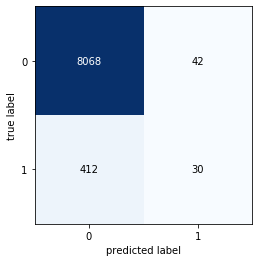

In [167]:
lr = LogisticRegression()

# Fit..
lr.fit(X_train_without_PCA[col_for_rfe], y_train_without_PCA)

# Predict..
y_pred_LR = lr.predict(X_test_without_PCA[col_for_rfe])

# Evaluate the model
print(classification_report(y_test_without_PCA, y_pred_LR))
plot_confusion_matrix(confusion_matrix(y_test_without_PCA, y_pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8110
           1       0.18      0.83      0.29       442

    accuracy                           0.79      8552
   macro avg       0.58      0.81      0.58      8552
weighted avg       0.95      0.79      0.85      8552



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fd3179410>)

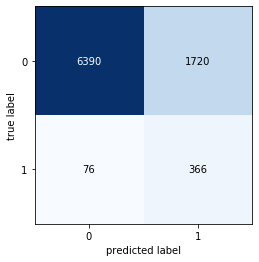

In [168]:
lr = LogisticRegression(class_weight='balanced')

# Fit..
lr.fit(X_train_without_PCA[col_for_rfe], y_train_without_PCA)

# Predict..
y_pred_LR = lr.predict(X_test_without_PCA[col_for_rfe])

# Evaluate the model
print(classification_report(y_test_without_PCA, y_pred_LR))
plot_confusion_matrix(confusion_matrix(y_test_without_PCA, y_pred_LR))

In [169]:
# Lets check the VIFs for the features to remove multicollinearity, if any
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_without_PCA[col_for_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_without_PCA[col_for_rfe].values, i) for i in range(X_train_without_PCA[col_for_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,onnet_mou_7,117.570000
7,std_og_t2t_mou_7,81.060000
3,offnet_mou_6,36.470000
4,loc_og_t2t_mou_7,31.830000
8,std_og_t2m_mou_6,22.230000
15,total_rech_amt_8,15.500000
1,arpu_8,14.850000
28,avg_offnet_mou,12.490000
12,loc_ic_mou_8,10.590000
22,arpu_2g_8,9.950000


In [170]:
# dropping all the variables with high vif since high vifs indicates that the corresponding
# variable may be expressed exactly by a linear combination of other variables
drop_more_vif_col = ['onnet_mou_7', 'std_og_t2t_mou_7']
col_for_rfe = col_for_rfe.drop(drop_more_vif_col, 1)
col_for_rfe

Index(['arpu_7', 'arpu_8', 'offnet_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_6', 'loc_og_mou_8', 'std_og_t2m_mou_6',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'count_rech_2g_8', 'av_rech_amt_data_8',
       'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'monthly_2g_8', 'fb_user_8',
       'aon', 'sep_vbc_3g', 'avg_onnet_mou', 'avg_offnet_mou',
       'avg_total_rech_data'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      8110
           1       0.17      0.84      0.29       442

    accuracy                           0.78      8552
   macro avg       0.58      0.81      0.58      8552
weighted avg       0.95      0.78      0.84      8552



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fd3209410>)

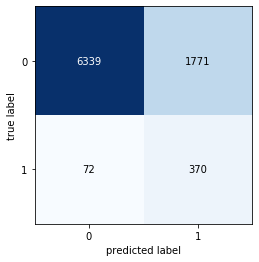

In [171]:
# Lets re-run the model using selected variables
lr = LogisticRegression(class_weight='balanced')

# Fit..
lr.fit(X_train_without_PCA[col_for_rfe], y_train_without_PCA)

# Predict..
y_pred_LR = lr.predict(X_test_without_PCA[col_for_rfe])

# Evaluate the model
print(classification_report(y_test_without_PCA, y_pred_LR))
plot_confusion_matrix(confusion_matrix(y_test_without_PCA, y_pred_LR))

In [172]:
# Checking vifs again,

vif = pd.DataFrame()
vif['Features'] = X_train_without_PCA[col_for_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_without_PCA[col_for_rfe].values, i) for i in range(X_train_without_PCA[col_for_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_6,35.500000
6,std_og_t2m_mou_6,21.520000
13,total_rech_amt_8,15.410000
1,arpu_8,14.830000
26,avg_offnet_mou,12.400000
10,loc_ic_mou_8,10.580000
20,arpu_2g_8,9.940000
4,loc_og_t2m_mou_6,9.110000
19,arpu_3g_8,8.940000
11,total_ic_mou_8,5.410000


In [173]:
# dropping variables with higher value
drop_more_vif_col = ['offnet_mou_6', 'std_og_t2m_mou_6',]
col_for_rfe = col_for_rfe.drop(drop_more_vif_col, 1)
col_for_rfe

Index(['arpu_7', 'arpu_8', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'count_rech_2g_8',
       'av_rech_amt_data_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8',
       'monthly_2g_8', 'fb_user_8', 'aon', 'sep_vbc_3g', 'avg_onnet_mou',
       'avg_offnet_mou', 'avg_total_rech_data'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      8110
           1       0.17      0.84      0.29       442

    accuracy                           0.78      8552
   macro avg       0.58      0.81      0.58      8552
weighted avg       0.95      0.78      0.84      8552



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4fd6604690>)

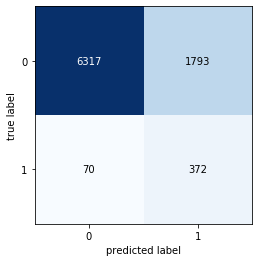

In [174]:
# Lets re-run the model using selected variables
lr = LogisticRegression(class_weight='balanced')

# Fit..
lr.fit(X_train_without_PCA[col_for_rfe], y_train_without_PCA)

# Predict..
y_pred_LR = lr.predict(X_test_without_PCA[col_for_rfe])

# Evaluate the model
print(classification_report(y_test_without_PCA, y_pred_LR))
plot_confusion_matrix(confusion_matrix(y_test_without_PCA, y_pred_LR))

In [175]:
# There is no change in recall value = 78%

In [176]:
# Checking vifs again,

vif = pd.DataFrame()
vif['Features'] = X_train_without_PCA[col_for_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_without_PCA[col_for_rfe].values, i) for i in range(X_train_without_PCA[col_for_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_rech_amt_8,15.290000
1,arpu_8,14.690000
8,loc_ic_mou_8,10.560000
18,arpu_2g_8,9.940000
17,arpu_3g_8,8.930000
9,total_ic_mou_8,5.410000
4,loc_og_mou_8,4.040000
6,loc_ic_t2m_mou_8,3.750000
5,total_og_mou_8,3.710000
0,arpu_7,3.700000


In [177]:
# dropping variables with higher value
drop_more_vif_col = ['total_rech_amt_8', 'arpu_8', 'loc_ic_mou_8']
col_for_rfe = col_for_rfe.drop(drop_more_vif_col, 1)
col_for_rfe

Index(['arpu_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'av_rech_amt_data_8', 'vol_3g_mb_8', 'arpu_3g_8',
       'arpu_2g_8', 'monthly_2g_8', 'fb_user_8', 'aon', 'sep_vbc_3g',
       'avg_onnet_mou', 'avg_offnet_mou', 'avg_total_rech_data'],
      dtype='object')

In [178]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_without_PCA[col_for_rfe])
logm2 = sm.GLM(list(y_train_without_PCA),X_train_sm, family = sm.families.Binomial(), class_weight='balanced')
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19928
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3262.2
Date:                Mon, 06 Jul 2020   Deviance:                       6524.5
Time:                        23:18:21   Pearson chi2:                 3.22e+09
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.4570      0.129    -34.431      0.000      -4.711      -4.203
arpu_7                  0.0745      0.045      1.639      0.101      -0.015       0.164
loc_og_t2t_mou_7        0.0653      0.073      0.901      0.368      -0.077       0.208
loc_og_t2m_mou_6       -0.0684      0.057     -1.206      0.228      -0.180       0.043
loc_og_mou_8           -0.4266      0.140     -3.051      0.002      -0.701      -0.153
total_og_mou_8         -1.0303      0.071    -14.559      0.000      -1.169      -0.892
loc_ic_t2m_mou_8       -1.0179      0.183     -5.563      0.000      -1.377      -0.659
loc_ic_mou_7            0.3882      0.070      5.571      0.000       0.252       0.525
total_ic_mou_8         -0.7862      0.144     -5.453      0.000      -1.069      -0.504
spl_ic_mou_8           -0.3299      0.063     -5.232      0.000      -0.454      -0.206
max_rech_amt_8          0.2231      0.045      4.916      0.000       0.134       0.312
last_day_rch_amt_8     -0.2666      0.052     -5.144      0.000      -0.368      -0.165
count_rech_2g_8        -0.5166      0.085     -6.113      0.000      -0.682      -0.351
av_rech_amt_data_8     -0.2905      0.087     -3.341      0.001      -0.461      -0.120
vol_3g_mb_8            -0.3916      0.141     -2.786      0.005      -0.667      -0.116
arpu_3g_8               0.3035      0.155      1.956      0.050      -0.001       0.608
arpu_2g_8              -0.2660      0.176     -1.515      0.130      -0.610       0.078
monthly_2g_8           -0.2192      0.083     -2.656      0.008      -0.381      -0.057
fb_user_8              -0.4712      0.077     -6.149      0.000      -0.621      -0.321
aon                    -0.2033      0.043     -4.746      0.000      -0.287      -0.119
sep_vbc_3g             -2.5639      0.720     -3.560      0.000      -3.976      -1.152
avg_onnet_mou           0.3571      0.038      9.490      0.000       0.283       0.431
avg_offnet_mou          0.4012      0.039     10.351      0.000       0.325       0.477
avg_total_rech_data     0.2587      0.045      5.798      0.000       0.171       0.346
=======================================================================================
"""

In [179]:
# Getting the predicted values on the train set
y_train_pred_LR = res.predict(X_train_sm)
y_train_pred_LR[:10]

0   0.014955
1   0.318012
2   0.015818
3   0.006535
4   0.002157
5   0.027809
6   0.000684
7   0.077621
8   0.006677
9   0.088378
dtype: float64

In [180]:
y_train_pred_LR = y_train_pred_LR.values.reshape(-1)
y_train_pred_LR[:10]

array([0.01495471, 0.3180123 , 0.01581791, 0.00653497, 0.00215713,
       0.02780905, 0.0006836 , 0.07762141, 0.00667739, 0.0883777 ])

In [181]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':list(y_train_without_PCA), 'Churn_Prob':y_train_pred_LR})
y_train_pred_final['CustID'] = y_train_without_PCA.index
y_train_pred_final.head(25)

,Churn,Churn_Prob,CustID
0,0,0.014955,11465
1,1,0.318012,21150
2,0,0.015818,2498
3,0,0.006535,13702
4,0,0.002157,20184
5,0,0.027809,5502
6,0,0.000684,10325
7,0,0.077621,5995
8,0,0.006677,6228
9,0,0.088378,23573


In [182]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.2 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)
# Let's see the head
y_train_pred_final.head(25)

,Churn,Churn_Prob,CustID,predicted
0,0,0.014955,11465,0
1,1,0.318012,21150,1
2,0,0.015818,2498,0
3,0,0.006535,13702,0
4,0,0.002157,20184,0
5,0,0.027809,5502,0
6,0,0.000684,10325,0
7,0,0.077621,5995,0
8,0,0.006677,6228,0
9,0,0.088378,23573,0


In [183]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[17892   906]
 [  549   605]]


In [184]:
generate_model_report(y_train_pred_final.Churn, y_train_pred_final.predicted)

Accuracy =  0.9270749799518845
Precision =  0.400397088021178
Recall =  0.524263431542461
F1 Score =  0.4540337711069419


In [185]:
# Checking vifs again,

vif = pd.DataFrame()
vif['Features'] = X_train_without_PCA[col_for_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train_without_PCA[col_for_rfe].values, i) for i in range(X_train_without_PCA[col_for_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,arpu_2g_8,9.940000
14,arpu_3g_8,8.860000
3,loc_og_mou_8,3.990000
12,av_rech_amt_data_8,3.650000
7,total_ic_mou_8,3.310000
13,vol_3g_mb_8,2.980000
17,fb_user_8,2.960000
5,loc_ic_t2m_mou_8,2.860000
4,total_og_mou_8,2.850000
6,loc_ic_mou_7,2.700000


In [186]:
# dropping variables with higher value
drop_more_vif_col = ['arpu_2g_8', 'arpu_3g_8']
col_for_rfe = col_for_rfe.drop(drop_more_vif_col, 1)
col_for_rfe

Index(['arpu_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'av_rech_amt_data_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'fb_user_8', 'aon', 'sep_vbc_3g', 'avg_onnet_mou', 'avg_offnet_mou',
       'avg_total_rech_data'],
      dtype='object')

In [187]:
X_train_sm = sm.add_constant(X_train_without_PCA[col_for_rfe])
logm2 = sm.GLM(list(y_train_without_PCA),X_train_sm, family = sm.families.Binomial(), class_weight='balanced')
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                19952
Model:                            GLM   Df Residuals:                    19930
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3263.9
Date:                Mon, 06 Jul 2020   Deviance:                       6527.7
Time:                        23:21:14   Pearson chi2:                 3.31e+09
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.4510      0.129    -34.511      0.000      -4.704      -4.198
arpu_7                  0.0741      0.046      1.627      0.104      -0.015       0.163
loc_og_t2t_mou_7        0.0651      0.073      0.898      0.369      -0.077       0.207
loc_og_t2m_mou_6       -0.0669      0.057     -1.181      0.238      -0.178       0.044
loc_og_mou_8           -0.4271      0.140     -3.056      0.002      -0.701      -0.153
total_og_mou_8         -1.0317      0.071    -14.581      0.000      -1.170      -0.893
loc_ic_t2m_mou_8       -1.0171      0.183     -5.558      0.000      -1.376      -0.658
loc_ic_mou_7            0.3874      0.070      5.567      0.000       0.251       0.524
total_ic_mou_8         -0.7861      0.144     -5.453      0.000      -1.069      -0.504
spl_ic_mou_8           -0.3306      0.063     -5.245      0.000      -0.454      -0.207
max_rech_amt_8          0.2277      0.045      5.038      0.000       0.139       0.316
last_day_rch_amt_8     -0.2665      0.052     -5.153      0.000      -0.368      -0.165
count_rech_2g_8        -0.5217      0.083     -6.280      0.000      -0.684      -0.359
av_rech_amt_data_8     -0.2955      0.079     -3.738      0.000      -0.450      -0.141
vol_3g_mb_8            -0.3307      0.123     -2.693      0.007      -0.571      -0.090
monthly_2g_8           -0.2251      0.076     -2.969      0.003      -0.374      -0.077
fb_user_8              -0.4779      0.064     -7.426      0.000      -0.604      -0.352
aon                    -0.2031      0.043     -4.740      0.000      -0.287      -0.119
sep_vbc_3g             -2.5453      0.718     -3.546      0.000      -3.952      -1.138
avg_onnet_mou           0.3570      0.038      9.488      0.000       0.283       0.431
avg_offnet_mou          0.4014      0.039     10.358      0.000       0.325       0.477
avg_total_rech_data     0.2572      0.045      5.771      0.000       0.170       0.345
=======================================================================================
"""

In [188]:
# Getting the predicted values on the train set
y_train_pred_LR = res.predict(X_train_sm)
y_train_pred_LR[:10]

0   0.015409
1   0.317754
2   0.015714
3   0.006074
4   0.002159
5   0.027930
6   0.000685
7   0.077680
8   0.006703
9   0.091947
dtype: float64

In [189]:
y_train_pred_LR = y_train_pred_LR.values.reshape(-1)
y_train_pred_LR[:10]

array([0.01540908, 0.31775362, 0.01571427, 0.00607374, 0.00215862,
       0.02792971, 0.00068473, 0.07768046, 0.00670346, 0.09194734])

In [190]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':list(y_train_without_PCA), 'Churn_Prob':y_train_pred_LR})
y_train_pred_final['CustID'] = y_train_without_PCA.index
y_train_pred_final.head(25)

,Churn,Churn_Prob,CustID
0,0,0.015409,11465
1,1,0.317754,21150
2,0,0.015714,2498
3,0,0.006074,13702
4,0,0.002159,20184
5,0,0.027930,5502
6,0,0.000685,10325
7,0,0.077680,5995
8,0,0.006703,6228
9,0,0.091947,23573


In [191]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.1 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
# Let's see the head
y_train_pred_final.head(25)

,Churn,Churn_Prob,CustID,predicted
0,0,0.015409,11465,0
1,1,0.317754,21150,1
2,0,0.015714,2498,0
3,0,0.006074,13702,0
4,0,0.002159,20184,0
5,0,0.027930,5502,0
6,0,0.000685,10325,0
7,0,0.077680,5995,0
8,0,0.006703,6228,0
9,0,0.091947,23573,0


In [192]:
generate_model_report(y_train_pred_final.Churn, y_train_pred_final.predicted)

Accuracy =  0.8576583801122695
Precision =  0.24835820895522387
Recall =  0.7209705372616985
F1 Score =  0.369449378330373


In [193]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16280  2518]
 [  322   832]]


In [194]:
# With recall 72%, we are good to select better features
# Higher the feature, higher is the importance

Feature: 0, Score: 0.07410
Feature: 1, Score: 0.06510
Feature: 2, Score: -0.06690
Feature: 3, Score: -0.42710
Feature: 4, Score: -1.03170
Feature: 5, Score: -1.01710
Feature: 6, Score: 0.38740
Feature: 7, Score: -0.78610
Feature: 8, Score: -0.33060
Feature: 9, Score: 0.22770
Feature: 10, Score: -0.26650
Feature: 11, Score: -0.52170
Feature: 12, Score: -0.29550
Feature: 13, Score: -0.33070
Feature: 14, Score: -0.22510
Feature: 15, Score: -0.47790
Feature: 16, Score: -0.20310
Feature: 17, Score: -2.54530
Feature: 18, Score: 0.35700
Feature: 19, Score: 0.40140
Feature: 20, Score: 0.25720


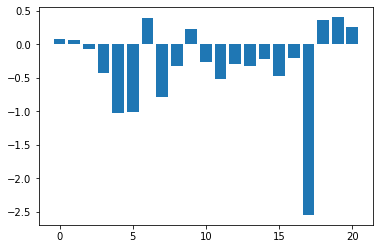

In [195]:
# get important variable
from matplotlib import pyplot
importance = [0.0741, 0.0651, -0.0669, -0.4271, -1.0317, -1.0171, 0.3874, -0.7861, -0.3306, 0.2277, -0.2665,
              -0.5217, -0.2955, -0.3307, -0.2251, -0.4779, -0.2031, -2.5453, 0.3570, 0.4014, 0.2572]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# Bar Chart of Logistic Regression Coefficients as Feature Importance Scores, please refer the above summary table
# for features along with the coefficients

From the above grap as well as the summary table, we see that avg_onnet_mou, avg_offnet_mou, avg_total_rech_data, max_rech_amt_8, loc_ic_mou_7 are the top five features with high coefficient value

### End of feature selection

**Principal Component Analysis** helps you interpret your data, but it will not always find the important patterns. Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features

In [244]:
X_train.drop(['mobile_number','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)
X_test.drop(['mobile_number','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

In [245]:
pca = PCA(random_state = 42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [246]:
pca.components_

array([[ 1.14461021e-19, -1.66533454e-16,  3.33066907e-16, ...,
         5.42809396e-01,  4.59472235e-01, -4.32559226e-05],
       [-4.15698140e-19,  5.55111512e-17,  5.55111512e-17, ...,
         1.52205656e-02,  1.61048488e-02,  7.75939046e-05],
       [ 1.46985715e-18, -3.33066907e-16,  1.66533454e-16, ...,
        -4.59665203e-01,  6.47112545e-02, -6.16613752e-05],
       ...,
       [-0.00000000e+00,  2.33045017e-03,  2.00504004e-03, ...,
         2.21268030e-05, -1.81056311e-04,  1.43453923e-16],
       [ 0.00000000e+00, -5.60043875e-03, -7.58702315e-03, ...,
         1.14871357e-04,  3.00240367e-05, -6.67699132e-17],
       [ 9.99999573e-01, -7.39977996e-04,  5.40675614e-04, ...,
        -5.17917501e-06,  1.03549927e-05,  3.13497598e-15]])

In [247]:
pca.explained_variance_ratio_

array([3.26790046e-01, 1.76241273e-01, 8.29926842e-02, 6.85993757e-02,
       4.99214309e-02, 4.43289767e-02, 3.81619115e-02, 3.50575884e-02,
       2.77691029e-02, 2.20402545e-02, 1.41412069e-02, 1.03057158e-02,
       9.88017822e-03, 9.12756976e-03, 8.23684939e-03, 7.20983673e-03,
       5.92828971e-03, 5.76913467e-03, 5.12518356e-03, 4.57467598e-03,
       4.25644844e-03, 3.78994221e-03, 3.48042253e-03, 3.23157461e-03,
       2.80227808e-03, 2.37251527e-03, 2.08299113e-03, 1.99521331e-03,
       1.67140976e-03, 1.55689410e-03, 1.47015384e-03, 1.43270675e-03,
       1.33799346e-03, 1.28078400e-03, 1.20043522e-03, 1.07490047e-03,
       9.88563672e-04, 9.62175586e-04, 8.25764218e-04, 7.80597973e-04,
       6.70365551e-04, 6.03673427e-04, 5.70904210e-04, 5.09335508e-04,
       4.92656139e-04, 4.54293460e-04, 4.46852199e-04, 4.35085587e-04,
       4.26312130e-04, 3.93913388e-04, 3.37697126e-04, 3.19970652e-04,
       2.90676205e-04, 2.79545774e-04, 2.54171668e-04, 2.42851277e-04,
      

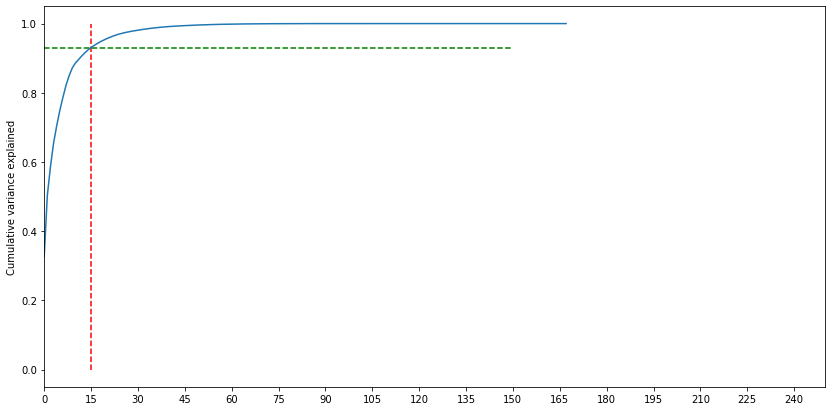

In [249]:
fig = plt.figure(figsize=[14,7])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=150, xmin=0,colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.xlim([0,250])
plt.xticks(np.arange(0,250, 15))
#plt.ylim([-3, 3])
plt.show()

Looking at the above explained variance ratio plot, we can see that 0.93 i.e 93% variance can be explained using 60 principal components. Let's build a model with 15 variables

In [250]:
pca_60 = IncrementalPCA(n_components=15)
final_train = pca_60.fit_transform(X_train)

In [253]:

final_test = pca_60.transform(X_test)

In [254]:
final_train.shape

(40292, 15)

In [255]:
final_test.shape

(7126, 15)

In [256]:
#compute the correlation matrix using numpy.corrcoef
corrmat = np.corrcoef(final_train.transpose())

In [257]:
corrmat.shape

(15, 15)

### Building Models with PCA

**Model-1:** Logistic Regression

In [258]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(final_train,y_train)

In [259]:
#making predictions on the test
pred_probs_test = model_pca.predict_proba(final_test)

In [260]:
pred_probs_test

array([[0.54599532, 0.45400468],
       [0.18342757, 0.81657243],
       [0.74429061, 0.25570939],
       ...,
       [0.84771606, 0.15228394],
       [0.73596975, 0.26403025],
       [0.69855453, 0.30144547]])

In [261]:
#probs = LRC.predict_proba(x)
class_indexes = np.argmax(pred_probs_test,axis=1)
max_probs = pred_probs_test[np.arange(len(final_test)),class_indexes]
class_output = model_pca.classes_[class_indexes]
class_prob_list = zip(class_output,max_probs)
print([str(cls)+'|'+"{:10.5f}".format(prob) for cls,prob in class_prob_list])

['0|   0.54600', '1|   0.81657', '0|   0.74429', '0|   0.61971', '1|   0.75620', '0|   0.77191', '0|   0.97048', '1|   0.62110', '1|   0.79154', '0|   0.83264', '0|   0.56648', '1|   0.81873', '0|   0.56761', '0|   0.62938', '0|   0.99396', '0|   0.96821', '0|   0.99992', '0|   0.89418', '0|   0.53172', '0|   0.87512', '1|   0.51301', '0|   0.83237', '0|   0.75706', '1|   0.56827', '0|   0.86965', '0|   0.60735', '0|   0.75157', '0|   0.66039', '1|   0.64239', '0|   0.62888', '0|   0.56386', '0|   0.71645', '0|   0.57261', '0|   0.54167', '0|   0.96458', '0|   0.80136', '0|   0.76824', '0|   0.61517', '0|   0.85673', '0|   0.81151', '0|   0.86432', '0|   0.69141', '0|   0.75004', '0|   0.55470', '0|   0.93780', '0|   0.76249', '0|   0.52469', '0|   0.69969', '0|   0.65569', '0|   0.52551', '1|   0.51224', '0|   0.81280', '0|   0.59775', '1|   0.71202', '0|   0.58161', '0|   0.54873', '0|   0.99637', '1|   0.66543', '0|   0.76101', '0|   0.90215', '0|   0.54372', '0|   0.65723', '0|   0

### Choice of Evaluation Metric - Recall_Score
Considering that we wish to identify customers who might churn rather than customers who might not churn, we cannot afford to misclassify a churn customer as non-churn. On the other hand, it's acceptable to misclassify a non-churn customer as Churn Customer because we are not losing the customer. 
For this reason, we need to maintain the recall high, i.e keeping the False Negatives to a minimum. Recall can be considered as one of the metrics to evaluate our model. <br/><br/>
On the other hand, misclassifying a non-churn customer as churn is acceptable only to a certain extent because if we keep misclassifying non-churners, the business might be rolling out offers to customers who are not likely to churn. Keeping this in mind, we also need to maintain the precision score high enough. <br/><br/>
Another metric that we are interested in is the AUC(Area Under the Curve for Receiver Operating Characteristic) which is comparable across different models and gives an overall idea about the model efficiency. 


In [262]:
dictionary = {'y_true': y_test, 'y_pred_prb': pred_probs_test[:,-1]}
output_df_lr = pd.DataFrame(dictionary)

Let's mark the customer with a probability of 0.45 as a potential churn customer and not 0.5 because we don't want to wrongly predict churn customer as non-churn customer. 


In [463]:
output_df_lr['y_pred'] = output_df_lr.apply(lambda row : 1 if row['y_pred_prb']>0.45 else 0,axis=1)

In [444]:
# Define a **print_metrics** function to display all the metrics for the model that is built based on the respective **output_df**. 
def print_metrics(output):
    print('Area Under the ROC -', "{0:10.4f}".format(metrics.roc_auc_score(output['y_true'],output['y_pred'])*100),'%')
    print('Accuracy Score - ',"{0:10.4f}".format(metrics.accuracy_score(output['y_true'],output['y_pred'])*100),'%')
    print('F1 Score - ',"{0:10.4f}".format(metrics.f1_score(output['y_true'],output['y_pred'])*100),'%')
    #print('Precision Score - ',"{0:10.4f}".format(metrics.precision_score(output['y_true'],output['y_pred'])*100),'%')
    print('Recall Score - ',"{0:10.4f}".format(metrics.recall_score(output['y_true'],output['y_pred'])*100),'%')
    cm = confusion_matrix(output['y_true'],output['y_pred'])

    TN = cm[0][0]
    FP = cm[0][1]
    TP = cm[1][1] 
    FN = cm[1][0]
    
    print('True Negatives - ', TN)
    print('False Positives - ', FP)
    print('True Positives - ', TP)
    print('False Negatives - ', FN)

In [446]:
print_metrics(output_df_lr)

Area Under the ROC -    74.9352 %
Accuracy Score -     67.7238 %
F1 Score -     20.7989 %
Recall Score -     82.9670 %
True Negatives -  4524
False Positives -  2238
True Positives -  302
False Negatives -  62


In [278]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(output_df_lr['y_true'], output_df_lr['y_pred'])
roc_auc = auc(false_positive_rate, true_positive_rate)

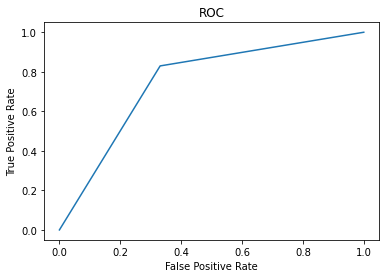

In [279]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [280]:
confusion_matrix(y_test,output_df_lr['y_pred'])

array([[4524, 2238],
       [  62,  302]], dtype=int64)

**Model-2:** Random Forest Ensemble

In [281]:
#Let's build the model with default hyper parameters
rfc = RandomForestClassifier()
rfc.fit(final_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [282]:
predictions = rfc.predict(final_test)

In [283]:
dictionary = {'y_true':y_test, 'y_pred':predictions}
output_df_rf = pd.DataFrame(dictionary)

In [447]:
print_metrics(output_df_rf)

Area Under the ROC -    74.9397 %
Accuracy Score -     84.9986 %
F1 Score -     30.2674 %
Recall Score -     63.7363 %
True Negatives -  5825
False Positives -  937
True Positives -  232
False Negatives -  132


In [306]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_recall = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1, scoring = 'recall')

In [309]:
#7:26 am
grid_search_recall.fit(final_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 47.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [312]:
#print the best parameters
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

In [456]:
rf_best = RandomForestClassifier(max_depth= 10,max_features= 5,min_samples_leaf= 100,min_samples_split= 200, n_estimators= 200)
rf_best.fit(final_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [457]:
predictions = rf_best.predict(final_test)

In [458]:
dictionary = {'y_true':y_test, 'y_pred':predictions}
output_df_rf_best = pd.DataFrame(dictionary)

In [459]:
print_metrics(output_df_rf_best)

Area Under the ROC -    74.9027 %
Accuracy Score -     84.9284 %
F1 Score -     30.1691 %
Recall Score -     63.7363 %
True Negatives -  5820
False Positives -  942
True Positives -  232
False Negatives -  132


In [285]:
confusion_matrix(y_test,output_df_rf['y_pred'])

array([[6704,   58],
       [ 322,   42]], dtype=int64)

In [331]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(output_df_rf['y_true'], output_df_rf['y_pred'])
roc_auc = auc(false_positive_rate, true_positive_rate)

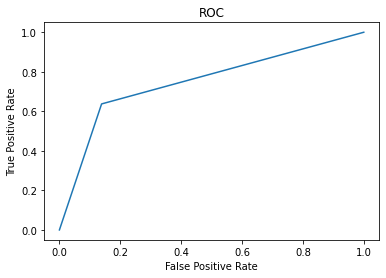

In [332]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

**Model-3:** K - Nearest Neighbours

In [333]:
#Let's first build a default KNN model and later tune the n_neighbours hyper parameter.
knn_default = KNeighborsClassifier()
knn_default.fit(final_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [451]:
%%time
predictions_knn = knn_default.predict(final_test)

Wall time: 5.39 s


In [452]:
%%time
dictionary = {'y_true':y_test, 'y_pred':predictions_knn}
output_df_knn = pd.DataFrame(dictionary)

Wall time: 1.99 ms


In [453]:
print_metrics(output_df_knn)

Area Under the ROC -    66.3615 %
Accuracy Score -     86.7247 %
F1 Score -     25.1582 %
Recall Score -     43.6813 %
True Negatives -  6021
False Positives -  741
True Positives -  159
False Negatives -  205


In [430]:
#function to calculate area_under the roc , accuracy score, recall score and F1 score
def cal_relavent_metrics(y_pred,i):
    return list(["{0:10.4f}".format(metrics.roc_auc_score(y_test,y_pred)*100),"{0:10.4f}".format(metrics.accuracy_score(y_test,y_pred)*100),"{0:10.4f}".format(metrics.recall_score(y_test,y_pred)*100),i])

To find the optimal value to maximize the recall score f1 score and area under the curve, we are running the model for every value of k in range(1,50,1) using a for loop. The reason to go ahead with this approach than the GridSearchCV approach was lack of processing power. 

In [432]:
output_df_knn = pd.DataFrame(columns =['roc_auc_score','accuracy_score','recall_score','k_value'])

for i in range(1,50,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(final_train,y_train)
    predictions_knn = knn.predict(final_test)
    output_df_knn.loc[i]  =cal_relavent_metrics(predictions_knn,i)
    

In [433]:
output_df_knn

,roc_auc_score,accuracy_score,recall_score,k_value
1,58.3660,91.7766,21.1538,1
2,58.3660,91.7766,21.1538,2
3,62.5984,88.9559,33.2418,3
4,62.5984,88.9559,33.2418,4
5,66.3615,86.7247,43.6813,5
6,66.3615,86.7247,43.6813,6
7,67.5548,84.5495,48.6264,7
8,67.5548,84.5495,48.6264,8
9,68.6108,82.3604,53.2967,9
10,68.6404,82.4165,53.2967,10


In [434]:
output_df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   roc_auc_score   49 non-null     object
 1   accuracy_score  49 non-null     object
 2   recall_score    49 non-null     object
 3   k_value         49 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


In [435]:
#Let's convert the object columns to numeric columns
for col in output_df_knn.columns:
    output_df_knn[col] = pd.to_numeric(output_df_knn[col])

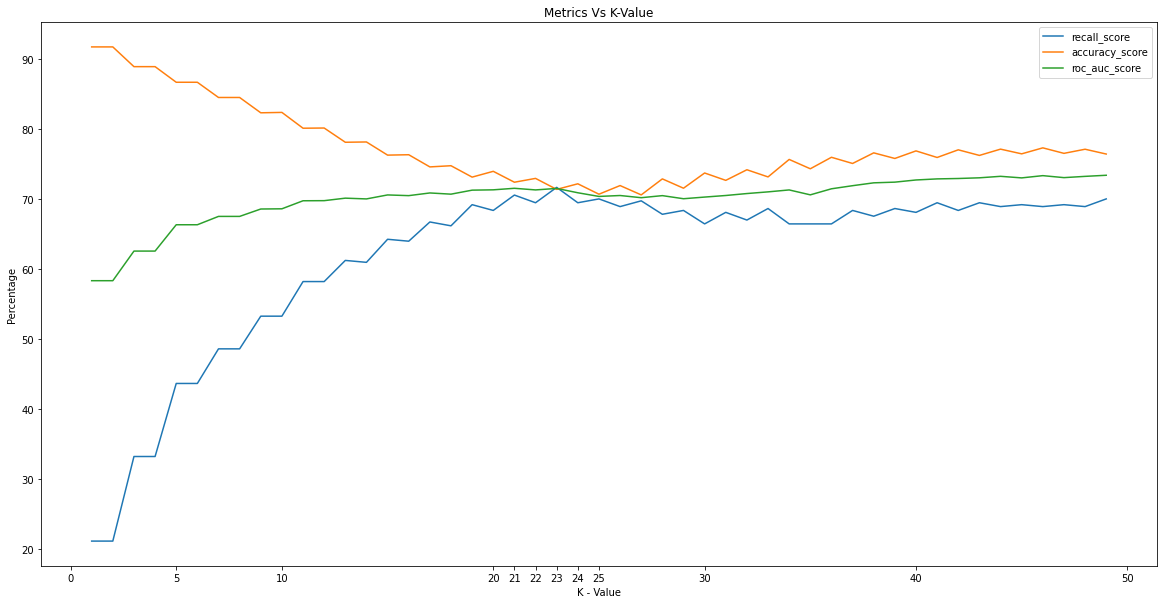

In [442]:
plt.figure(figsize=[20,10])

plt.xlabel('K - Value')
plt.ylabel('Percentage')
plt.title('Metrics Vs K-Value')
plt.xticks(ticks=[0,5,10,20,21,22,23,24,25,30,40,50])
plt.plot(output_df_knn['k_value'],output_df_knn['recall_score'],label='recall_score')
plt.plot(output_df_knn['k_value'],output_df_knn['accuracy_score'],label='accuracy_score')
plt.plot(output_df_knn['k_value'],output_df_knn['roc_auc_score'],label='roc_auc_score')

plt.legend()
plt.show()

Looking at the above plot, we get the best recall,accuracy and roc_auc at k=23. So, we will proceed to create a K-Neighbors Classifier model with K=23

In [445]:
knn23 = KNeighborsClassifier(n_neighbors=23)              #Instance of KNN with K=23
knn23.fit(final_train,y_train)                            #fit the model on the train data
predictions = knn23.predict(final_test)                   #predicti the value for test data 
dictionary ={'y_true':y_test,'y_pred':predictions}
output_df_knn_23 = pd.DataFrame(dictionary)               #Create output_df_knn_23 to print the metrics
print_metrics(output_df_knn_23)

Area Under the ROC -    71.5511 %
Accuracy Score -     71.4145 %
F1 Score -     20.3986 %
Recall Score -     71.7033 %
True Negatives -  4828
False Positives -  1934
True Positives -  261
False Negatives -  103


Let's print the accuracy and the recall score of the 3 models(Logistic Regression, Random Forest Ensemble, K-Neighbors Classifier) to suggest a better model

In [464]:
print('Accuracy score for Logistic Regression model - ', "{0:10.2f}".format(accuracy_score(y_test,output_df_lr['y_pred'])*100))
print('Recall score for Logistic Regression model - ', "{0:10.2f}".format(recall_score(y_test,output_df_lr['y_pred'])*100))
print('Accuracy score for Random Forest Ensemble model - ', "{0:10.2f}".format(accuracy_score(y_test,output_df_rf['y_pred'])*100))
print('Recall score for Random Forest Ensemble model - ', "{0:10.2f}".format(recall_score(y_test,output_df_rf['y_pred'])*100))
print('Accuracy score for K-Neighbors Classifier model - ', "{0:10.2f}".format(accuracy_score(y_test,output_df_knn_23['y_pred'])*100))
print('Recall score for K-Neighbors Classifier model - ', "{0:10.2f}".format(recall_score(y_test,output_df_knn_23['y_pred'])*100))

Accuracy score for Logistic Regression model -       67.72
Recall score for Logistic Regression model -       82.97
Accuracy score for Random Forest Ensemble model -       85.00
Recall score for Random Forest Ensemble model -       63.74
Accuracy score for K-Neighbors Classifier model -       71.41
Recall score for K-Neighbors Classifier model -       71.70


**Recommendations for choosing the model -** Looking at the recall scores and the accuracy score, it's recommended that we use Logistic Regression model for predicting the churn-customers because of the better Recall Score than the other two models and the accuracy score is not bad either. We can further tweak the threshold value while predicting the churn manually from current value(0.45) to lower value based on the business requirements. 